# Homework 7

## by Dion Ho


# Import Python Libraries

In [1]:
import numpy as np
import math
import scipy as sc
import time
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from numpy import sin, cos, linspace, exp
from math import pi
from math import factorial
from matplotlib import pyplot as plt

## Q1

\begin{align*}
[D_N]_{i,j} &= L'_j(x_i) \\
&= L_j(x_i)\sum_{k=0,k\neq j}^N \frac{1}{x_i - x_k} \\
&= \frac{1}{a_j}\prod_{k=0,k\neq j}^N (x_i - x_k)\sum_{k=0,k\neq j}^N \frac{1}{x_i - x_k} \\
&= \frac{1}{a_j}\prod_{k=0,k\neq j}^N(x_i - x_k)\left(\frac{\displaystyle\sum_{k=0,k\neq j}^N\left(\prod_{m=0,m\neq k, m\neq j}^N (x_i - x_m)\right)}{\displaystyle\prod_{k=0,k\neq j}^N(x_i - x_k)}\right) \\
&= \frac{1}{a_j}\sum_{k=0,k\neq j}^N\left(\prod_{m=0,m\neq k, m\neq j}^N (x_i - x_m)\right).
\end{align*}

Suppose that $i \neq j$, then within the summation, every term equals zero due to a multiplication by $(x_i - x_i) = 0$ in the product. The only exception is when $k = i$. Therefore, we get

\begin{align*}
[D_N]_{i,j} &= \frac{1}{a_j}\prod_{m=0,m\neq i, m\neq j}^N (x_i - x_m) \\
&= \frac{\displaystyle\prod_{m=0,m\neq i}^N (x_i - x_m)}{a_j(x_i - x_j)} \\
&= \frac{a_i}{a_j(x_i - x_j)}.
\end{align*}

Suppose that $i = j$, then
\begin{align*}
[D_N]_{i,j} &= \frac{1}{a_j}\sum_{k=0,k\neq j}^N\left(\prod_{m=0,m\neq k, m\neq j}^N (x_j - x_m)\right) \\
&= \frac{1}{a_j}\sum_{k=0,k\neq j}^N\left(\frac{\displaystyle\prod_{m=0, m\neq j}^N (x_j - x_m)}{x_j - x_k}\right) \\
&= \frac{1}{a_j}\sum_{k=0,k\neq j}^N\left(\frac{a_j}{x_j - x_k}\right) \\
&= \sum_{k=0,k\neq j}^N\left(x_j - x_k\right)^{-1}.
\end{align*}

## Q2

In [2]:
def chebspace(N,m=-1,M=1,Zero=False): #Returns N Chebyshev Extremum (Default) or Zero points in the specified interval (Default is [-1,1]).
    r = (m + M)/2
    if (Zero == True):
        pts = cos((np.array(range(N,0,-1)) - 0.5)*np.pi/N)
    else:
        pts = cos(np.array(range(N-1,-1,-1))*np.pi/(N-1))
    return (pts*(M - r) + r)

In [3]:
def chebdiffmat(x): #Returns the Chebyshev Differentiation Matrix
    N = len(x)-1
    DN = np.empty((N+1,N+1))
    def a(j):
        A = 1
        for k in range(0,N+1):
            if j != k:
                A *= x[j] - x[k]
        return A
    for i in range(0,N+1):
        for j in range(0,N+1):
            if i != j:
                DN[i,j] = a(i)/(a(j)*(x[i]-x[j]))
            else:
                E = 0
                for k in range(0,N+1):
                    if k != j:
                        E += 1/(x[j] - x[k])
                DN[i,j] = np.copy(E)
    return DN

#### Show that the power $D_N^{N+1}$ is identically equal to zero

Consider an arbitrary $N$ degree polynomial uniquely represented by the vector
$$\left(\begin{array}{c} P(x_0) \\ P(x_1) \\ \vdots \\ P(x_N) \end{array}\right).$$

We know that differentiating the polynomial $N+1$ times will produce $\vec{0}$. We are also given that $D_N$ is the differential operator, i.e.
$$\left(\begin{array}{c} y_0' \\ y_1' \\ \vdots \\ y_N' \end{array}\right)
= D_N \left(\begin{array}{c} y_0 \\ y_1 \\ \vdots \\ y_N \end{array}\right).$$
Therefore, by repeated application of the operator $D_N$,
$$(D_N)^{N+1}\left(\begin{array}{c} P(x_0) \\ P(x_1) \\ \vdots \\ P(x_N) \end{array}\right) = \left(\begin{array}{c} P^{(N+1)}(x_0) \\ P^{(N+1)}(x_1) \\ \vdots \\ P^{(N+1)}(x_N) \end{array}\right) = \left(\begin{array}{c} 0 \\ 0 \\ \vdots \\ 0 \end{array}\right).$$

Since $P(x_0),\ldots,P(x_N)$ are arbitrary, it must be that $D_N^{N+1}$ is the zero operator, which implies that $[D_N]^{N+1}$ is the zero matrix.

#### Check that $D_N^{N+1}$ is identically equal to zero

In [4]:
N = 5
x = chebspace(N+1)
A = np.eye(N+1)
DN = chebdiffmat(x)
for k in range(0,N+1):
    A = A@DN
print("For N =",N,", the 2-norm of DN^%i =" %(N+1), np.linalg.norm(A,ord=2))

N = 20
x = chebspace(N+1)
A = np.eye(N+1)
DN = chebdiffmat(x)
for k in range(0,N+1):
    A = A@DN
print("For N =",N,", the 2-norm of DN^%i =" %(N+1), np.linalg.norm(A,ord=2))

For N = 5 , the 2-norm of DN^6 = 6.787688568284223e-11
For N = 20 , the 2-norm of DN^21 = 9.416741003680831e+18


Theoretically, we know that $D_N^{N+1}$ is equal to zero. Indeed, for small values of $N$, for example $N = 5$, the 2-norm of the matrix $[D_N^{N+1}]$ is close to zero. However, the matrix $[D_N^{N+1}]$ is very numerically unstable. The instability is probably due to the terms $(x_i - x_j)$ and $(x_i - x_k)$ which appear in the denominator of the terms of $[D_N^{N+1}]$ being close to zero. Accordingly, the 2-norm of $[D_N^{N+1}]$ for large values of $N$, for example, $N=20$, is massive.

## Q3

We will cast the problem into the form $A\vec{U} = \vec{G}$. By distributivity of matrix multiplication, we know that
\begin{align*}
u_{xx} + 4u_x + e^xu &= \partial_{xx}u + \partial_{x}4u + e^xu \\
&= \left([\partial_{xx}] + 4[\partial_{x}] + e^\vec{x}I\right)\vec{U} \\
&= \sin(8\vec{x}).
\end{align*}


### Finite Difference Matrices

Using the finite difference formulas,
\begin{align*}
&u''(x) = \frac{1}{h^2}u(x-h) - \frac{2}{h^2}u(x) + \frac{1}{h^2}u(x+h), \\
&u'(x) = - \frac{1}{h}u(x) + \frac{1}{h}u(x+h).
\end{align*}
we get
$$A = \frac{1}{h^2}\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & 0 & 0 & \ldots & 0 & 0 & 0\\
 1 & -2 & 1 & 0 & 0 & \ldots & 0 & 0 & 0\\
 0 & 1 & -2 & 1 & 0 & \ldots & 0 & 0 & 0\\
 \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
 0 & 0 & 0 & 0 & 0 &\ldots & 1 & -2 & 1 \\
 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 1 & -2
 \end{array} \right) +
 \frac{4}{h}\left(
\begin{array}{ccccccccc}
-1 & 1 & 0 & 0 & 0 & \ldots & 0 & 0 & 0\\
 0 & -1 & 1 & 0 & 0 & \ldots & 0 & 0 & 0\\
 0 & 0 & -1 & 1 & 0 & \ldots & 0 & 0 & 0\\
 \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
 0 & 0 & 0 & 0 & 0 &\ldots & 0 & -1 & 1 \\
 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & -1
 \end{array} \right) + e^{\vec{x}[1:n]}I
 $$
 
 $$\vec{U} = \left(
 \begin{array}{c}
 u(x_1) \\
 u(x_2) \\
 \vdots \\
 u(x_n)
 \end{array} \right) \hspace{2pc}
 \vec{G} = \left(
 \begin{array}{c}
 \sin(8x_1) - \displaystyle \frac{1}{h^2}u(x_0) \\
 \sin(8x_2) \\
 \vdots \\
 \sin(8x_{n-1}) \\
 \sin(8x_n) - \displaystyle \frac{1}{h^2}u(x_{n+1}) - \frac{4}{h}u(x_{n+1})
 \end{array} \right)$$
 
 
 ### Chebyshev Differentiation Matrices
 
 Using the Chebyshev Differentiation matrix,
 $$D_{n} := \left(\begin{array}{cccc}
 L'_1(x_1) & L'_2(x_1) & \ldots & L'_n(x_1) \\
 L'_1(x_2) & L'_2(x_2) & \ldots & L'_n(x_2) \\
 \vdots & \vdots & \ddots & \vdots \\
 L'_1(x_n) & L'_2(x_n) &\ldots & L'_n(x_n)
 \end{array} \right)$$
 we get
 $$A = 4[D_{n}] + [D_{n}]^2 + e^{\vec{x}[1:n]}I \hspace{2pc}\vec{U} = \left(
 \begin{array}{c}
 u(x_1) \\
 u(x_2) \\
 \vdots \\
 u(x_n)
 \end{array} \right) \hspace{2pc}
 \vec{G} = \left(
 \begin{array}{c}
 \sin(8x_1) \\
 \sin(8x_2) \\
 \vdots \\
 \sin(8x_{n-1}) \\
 \sin(8x_n)
 \end{array} \right)$$

In [5]:
def solve_for_U(xvals,G): #Finite Difference method
    h = xvals[2:]-xvals[1:-1] #We assume that the points are equispaced.
    d0 = -2/h**2
    d1 = 1/h[1:]**2
    dm1 = 1/h[0:-1]**2
    # Create the second diff. part of the "A" matrix by using the np.diag command
    A2 = np.diag(d0) + np.diag(d1,1) + np.diag(dm1,-1)
    
    d0_2 = -1/h
    d1_2 = 1/h[1:]
    # Create the first diff. part of the "A" matrix by using the np.diag command
    A1 = np.diag(d0_2) + np.diag(d1_2,1)
    
    A = A2 + 4*A1 + np.diag(exp(xvals[1:-1]))
    
    # Ax = b, solve for x.
    uvals = np.linalg.solve(A,G) #I'm using scipy sparse matrice solver else I may run into memory problems later.
    
    return uvals

In [6]:
def solve_for_U_sp(xvals,G): #Finite Difference method (using sparse matrices)
    h = xvals[2:]-xvals[1:-1] #We assume that the points are equispaced.
    d0 = -2/h**2
    d1 = 1/h[1:]**2
    dm1 = 1/h[0:-1]**2
    # Create the second diff. part of the "A" matrix by using the np.diag command
    A2 = sp.diags(d0) + sp.diags(d1,1)+ sp.diags(dm1,-1)
    
    d0_2 = -1/h
    d1_2 = 1/h[1:]
    # Create the first diff. part of the "A" matrix by using the np.diag command
    A1 = sp.diags(d0_2) + sp.diags(d1_2,1)
    
    A = A2 + 4*A1 + sp.diags(exp(xvals[1:-1]))
    
    # Ax = b, solve for x.
    uvals = spsolve(A,G) #I'm using scipy sparse matrice solver else I may run into memory problems later.
    
    return uvals

In [7]:
def appendBC(sol): #This function simply makes it easier to append the boundary conditions.
    return (np.insert((np.insert(sol,len(sol),Rbc)),0,Lbc)) #Add u_0 and u_n into yvals.

In [8]:
Lbc = 0
Rbc = 0
N = 2**8+1

#Using the Finite Difference matrices
xlin = linspace(-1,1,N)
h = np.abs(xlin[1] - xlin[0])
rhs = lambda x: sin(8*x)

G = rhs(xlin[1:N-1])
G[0] = np.copy(G[0]) - Lbc/h**2
G[N-3] = np.copy(G[N-3]) - Rbc/h**2 - 4*Lbc/h

#fd = appendBC(solve_for_U(xlin,G))
fd_sp = appendBC(solve_for_U_sp(xlin,G))

In [9]:
#Using the Chebyshev Differentiation matrices (it'll take a few seconds)
xcheb = chebspace(N)
Dn = chebdiffmat(xcheb)
G = rhs(xcheb)
A = 4*Dn + Dn@Dn + np.diag(exp(xcheb))
cheb = appendBC(np.linalg.solve(A,G)[1:N-1])

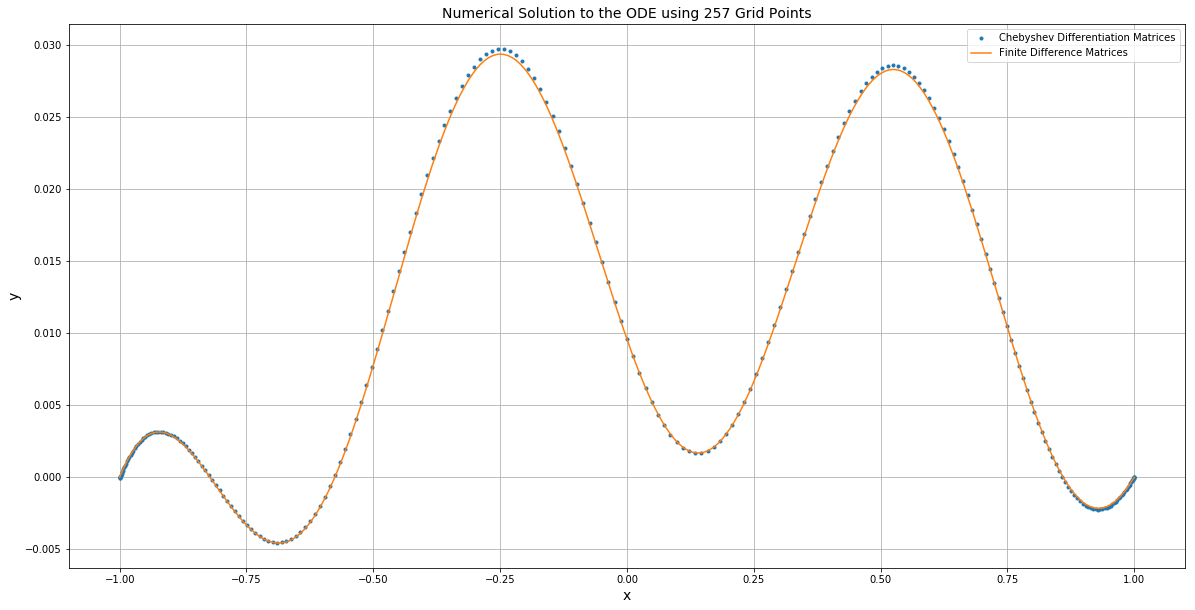

In [10]:
#plt.plot(xlin,fd)
plt.figure(figsize=(20,10))
plt.title("Numerical Solution to the ODE using 257 Grid Points", fontsize = 14)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.plot(xcheb,cheb,".")
plt.plot(xlin,fd_sp)
plt.legend(["Chebyshev Differentiation Matrices","Finite Difference Matrices"])
plt.grid()

Both methods produce comparable solutions to the ODE, with the results differing the most at the two peaks of the curve. Without the solution, it is difficult to determine which method is more accurate. The finite difference matrices method should be a first-order method due to the forward-difference first-order differential matrix. On the other hand, Chebyshev Differentiation matrices suffer from numerical instability as was demonstrated in Q2.

In [11]:
print("FD method")
print("u(0) ={:> 10.12f}".format(fd_sp[128]),"\n") #To 10 s.f.
print("Cheb method")
print("u(0) ={:> 10.12f}".format(cheb[128]),"\n")
print("Difference =",np.abs(fd_sp[128]-cheb[128]))
print("% Difference (based on fd_sp value) =",np.abs(fd_sp[128]-cheb[128])/fd_sp[128]*100,"%") 

FD method
u(0) = 0.009579881900 

Cheb method
u(0) = 0.009589111410 

Difference = 9.229510712473535e-06
% Difference (based on fd_sp value) = 0.09634263563122258 %


The values produced by the two methods are comparable.

### Runtime Tests

In [12]:
Lbc = 0
Rbc = 0
N = 100
rhs = lambda x: sin(8*x)
xlin = linspace(-1,1,N)
xcheb = chebspace(N)

trials = 15
avg1,avg2,avg3,avg4 = 0,0,0,0
for jj in range(0,trials): #Algorithm will take about half a minute.
    start_time = time.time()
    G = rhs(xlin[1:N-1])
    G[0] = np.copy(G[0]) - Lbc/h**2
    G[N-3] = np.copy(G[N-3]) - Rbc/h**2 - 4*Lbc/h
    fd_sp = appendBC(solve_for_U_sp(xlin,G))
    end_time = time.time()
    avg1+=(end_time-start_time)

    start_time = time.time()
    G = rhs(xlin[1:N-1])
    G[0] = np.copy(G[0]) - Lbc/h**2
    G[N-3] = np.copy(G[N-3]) - Rbc/h**2 - 4*Lbc/h
    fd = appendBC(solve_for_U(xlin,G))
    end_time = time.time()
    avg2+=(end_time-start_time)

    start_time = time.time()
    Dn = chebdiffmat(xcheb)
    G = rhs(xcheb)
    A = 4*Dn + Dn@Dn + np.diag(exp(xcheb))
    cheb = appendBC(np.linalg.solve(A,G)[1:N-1])
    end_time = time.time()
    avg3+=(end_time-start_time)

    start_time = time.time()
    G = rhs(xcheb)
    A = 4*Dn + Dn@Dn + np.diag(exp(xcheb))
    cheb = appendBC(np.linalg.solve(A,G)[1:N-1])
    end_time = time.time()
    avg4+=(end_time-start_time)
print("Runtime of FD method using sparse matrices")
print(avg1/trials,"\n")
print("Runtime of FD method using dense matrices")
print(avg2/trials,"\n")
print("Runtime of Cheb method")
print(avg3/trials,"\n")
print("Runtime of Cheb method ignoring construction of Cheb Diff. matrix")
print(avg4/trials,"\n")

Runtime of FD method using sparse matrices
0.002530256907145182 

Runtime of FD method using dense matrices
0.003457514444986979 

Runtime of Cheb method
0.9843186060587565 

Runtime of Cheb method ignoring construction of Cheb Diff. matrix
0.003127320607503255 



Evidently, my construction of the Chebyshev Differentiation matrix is an atrocity (it involves three loops after all). Regardless, even without including the time taken for the construction of the Cheb Diff. matrix into the runtime of the Cheb method, the most efficient variant of the FD method (using sparse matrices) is faster than the Cheb method. Granted, when dense matrices are used in the FD method it becomes slower than the Cheb method. Yet, a major advantage of the FD method is precisely that it uses sparse matrices and hence allows one to capitalise on their efficiency. The Cheb method on the other hand involves Cheb Diff. matrices which are dense.

## Q4

In [13]:
def InvPwrMtd(A,mu):
    m,n = np.shape(A)
    x0 = np.random.random(n)
    x0 = np.copy(x0/np.linalg.norm(x0,ord=2))
    Q,R = sc.linalg.qr(A - mu*np.eye(n))
    for k in range(0,n):
        x1 = sc.linalg.solve_triangular(R,np.matmul(np.matrix.getH(Q),x0))
        x1 = np.copy(x1/np.linalg.norm(x1,ord=2))
        x0 = x1
    return np.matmul(np.matmul(np.matrix.getH(x1),A),x1), x1

In [14]:
A = np.diag([4,3,2])
try: InvPwrMtd(A,4) 
except: print("Singular matrix in solver!")

Singular matrix in solver!


When we input an exact eigenvalue, the matrix in the solver (sc.linalg.solve_triangular) is singular and the method fails. This can be resolved by returning the eigenvalue if the matrix is found to be singular, though a separate method will be required to solve for the eigenvector.

In [15]:
def InvPwrMtd_edit(A,mu): #This edited version of the algorithm attempts to deal with the singular matrix that is formed when an exact eigenvalue is inputed.
    m,n = np.shape(A)
    x0 = np.random.random(n)
    x0 = np.copy(x0/np.linalg.norm(x0,ord=2))
    Q,R = sc.linalg.qr(A - mu*np.eye(n))
    for k in range(0,n):
        try:
            x1 = sc.linalg.solve_triangular(R,np.matmul(np.matrix.getH(Q),x0))
        except:
            return mu, np.empty(n)
        x1 = np.copy(x1/np.linalg.norm(x1,ord=2))
        x0 = x1
    return np.matmul(np.matmul(np.matrix.getH(x1),A),x1), x1

In [16]:
A = np.diag([4,3,2])
InvPwrMtd_edit(A,3) #It works, though it fails to find the eigenvector.

(3, array([4.89124989e-322, 1.97626258e-323, 3.71349264e-312]))

In [17]:
A = np.diag([4,3,2])
for kk in range(0,200):
    print("Eigenvalue =",InvPwrMtd(A,3.6)[0]) #The eigenvalue returned fluctuates significantly due to the random initial guess.

Eigenvalue = 3.8152967227169134
Eigenvalue = 3.534541399780117
Eigenvalue = 3.997016911553169
Eigenvalue = 3.499142992492133
Eigenvalue = 3.979443443551571
Eigenvalue = 3.997576401847119
Eigenvalue = 3.9137733037013356
Eigenvalue = 3.4516347880973677
Eigenvalue = 3.7990367661580393
Eigenvalue = 3.9998350849731783
Eigenvalue = 3.9463916072525134
Eigenvalue = 3.97997696817545
Eigenvalue = 3.8247336708986026
Eigenvalue = 3.9305531994951655
Eigenvalue = 3.9486576715977537
Eigenvalue = 3.976436692414702
Eigenvalue = 3.710449246764741
Eigenvalue = 3.996968952738506
Eigenvalue = 3.8770152599079477
Eigenvalue = 3.972330245458339
Eigenvalue = 3.917725080755413
Eigenvalue = 3.962919573773416
Eigenvalue = 3.555889052996059
Eigenvalue = 3.999455268768527
Eigenvalue = 3.865805168183628
Eigenvalue = 3.9985946069048572
Eigenvalue = 3.9919004106792793
Eigenvalue = 3.9590788059685735
Eigenvalue = 3.994280388880504
Eigenvalue = 3.9997692934599804
Eigenvalue = 3.955954173059825
Eigenvalue = 3.94794129451

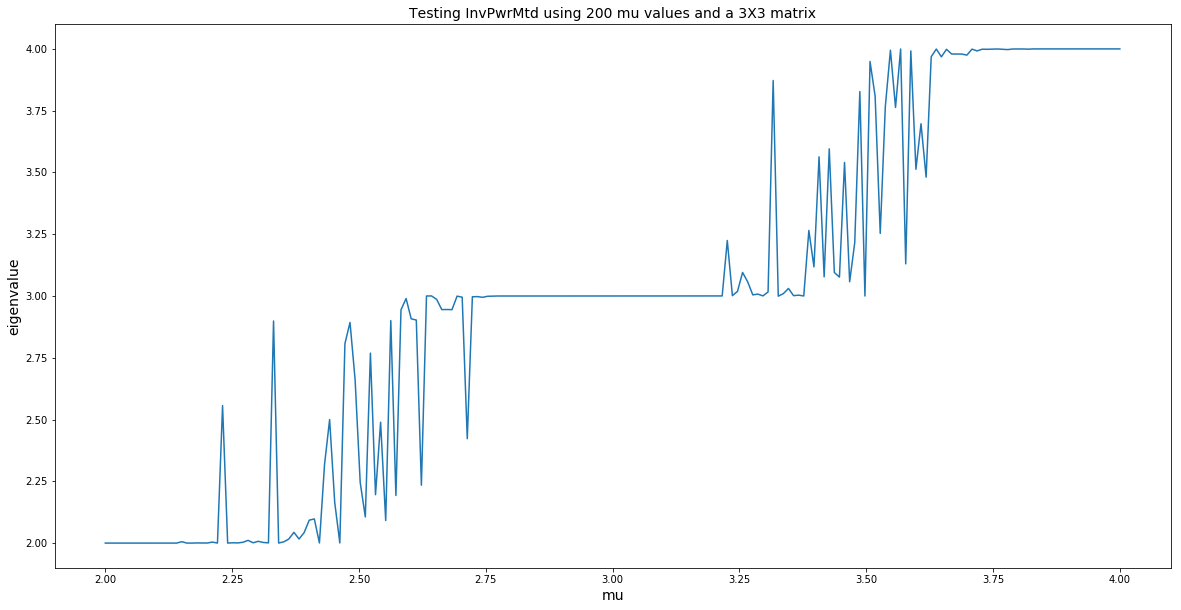

In [18]:
A = np.diag([4,3,2])
N = 200

e = np.empty(N)
q = linspace(2,4,N)
for kk in range(0,N):
    e[kk] = InvPwrMtd_edit(A,q[kk])[0]
plt.figure(figsize=(20,10))
plt.title("Testing InvPwrMtd using 200 mu values and a 3X3 matrix", fontsize = 14)
plt.xlabel("mu", fontsize = 14)
plt.ylabel("eigenvalue", fontsize = 14)
plt.plot(q,e)

Input of mu values in a sufficiently small neighbourhood around an eigenvalue will cause the algorithm to accurately return that eigenvalue. However, if the mu inputed is too far from any eigenvalue, the algorithm will not be able to accurately find the closest eigenvalue to mu.

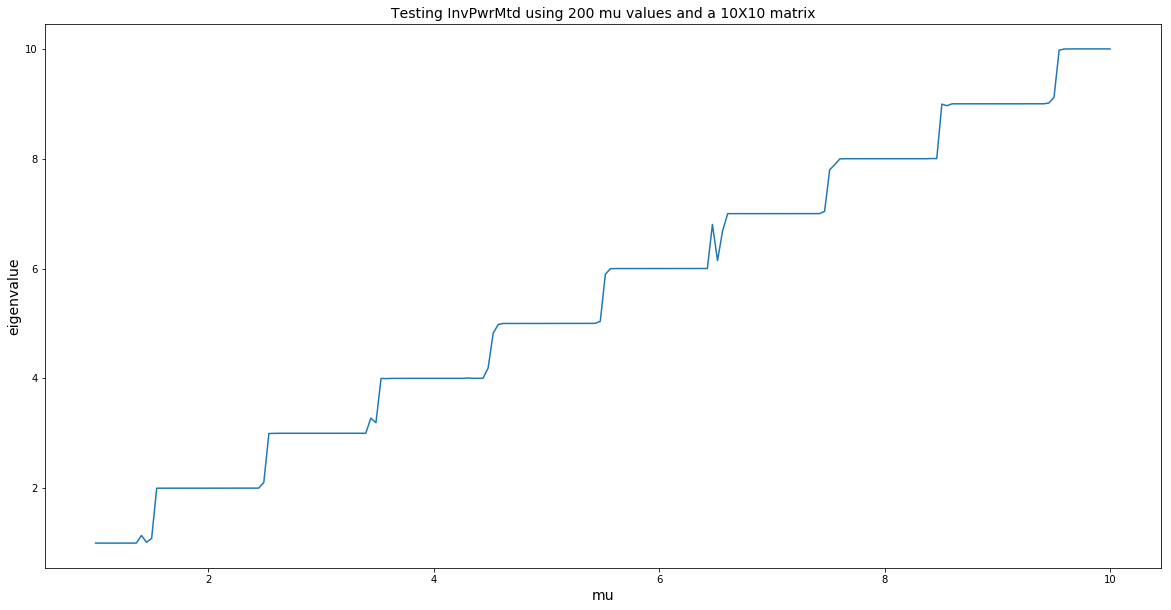

In [19]:
A = np.diag(linspace(1,10,10))
N = 200

e = np.empty(N)
q = linspace(1,10,N)
for kk in range(0,N):
    e[kk],u = InvPwrMtd_edit(A,q[kk])
plt.figure(figsize=(20,10))
plt.title("Testing InvPwrMtd using 200 mu values and a 10X10 matrix", fontsize = 14)
plt.xlabel("mu", fontsize = 14)
plt.ylabel("eigenvalue", fontsize = 14)
plt.plot(q,e)

The algorithm is a lot more accurate when the matrix used is larger. It is likely that the larger the matrix is, the larger the neighbourhood around each eigenvalue in which a mu value inputed can have the algorithm accurately return the closest eigenvalue to mu.

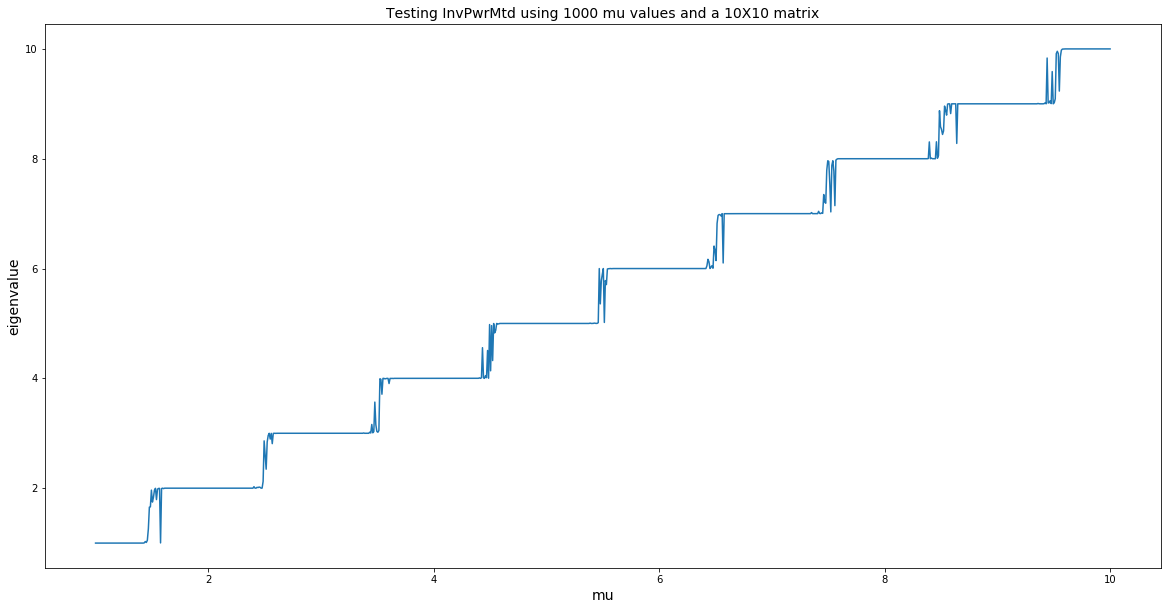

In [20]:
A = np.diag(linspace(1,10,10))
N = 1000

e = np.empty(N)
q = linspace(1,10,N)
for kk in range(0,N):
    e[kk],u = InvPwrMtd_edit(A,q[kk])
plt.figure(figsize=(20,10))
plt.title("Testing InvPwrMtd using 1000 mu values and a 10X10 matrix", fontsize = 14)
plt.xlabel("mu", fontsize = 14)
plt.ylabel("eigenvalue", fontsize = 14)
plt.plot(q,e)

Nonetheless, with a finer grid, we can see that some fluctuation persists near the midpoint between two eigenvalues.

## Q5

In [21]:
def QR_algorithm2(A,N,tol=1e-8):
    m,n = np.shape(A)
    if n == 1:
        return A[0][0]
    if n == 2:
        alpha = np.matrix.trace(A[0:2,0:2])
        beta = np.linalg.det(A[0:2,0:2])
        eig1 = 0.5*(alpha+np.sqrt(alpha**2 - 4*beta + 0j))
        eig2 = 0.5*(alpha-np.sqrt(alpha**2 - 4*beta + 0j))
        return eig1, eig2
    S = sc.linalg.hessenberg(A)
    for k in range(0,N):
        mu = np.copy(S[n-1,n-1])
        Q,R = np.linalg.qr(S-mu*np.eye(n))
        S = np.matmul(R,Q) + mu*np.eye(n)
        for j in range(0,m-1):
            if abs(S[j,j+1]) < tol:
                S[j,j+1] = S[j+1,j] = 0
    return QR_algorithm2(S[0:m//2,0:n//2],N), QR_algorithm2(S[m//2:,n//2:],N)

### Gram-Schmidt Solver Implemented in Class

In [22]:
def QR_GS_modified(A): #This uses a modified version of Gram-Schmitz which avoids possible numerical instability.
    n = np.shape(A)
    Q = np.zeros((n[0],n[1]))
    R = np.zeros((n[1],n[1]))
    S = np.copy(A)*1.0
    for j in range(0,n[1]):
        R[j,j] = np.linalg.norm(S[:,j])
        Q[:,j] = S[:,j]/R[j,j]
        for i in range(j+1,n[1]):
            R[j,i] = np.matmul(np.matrix.getH(Q[:,j]),A[:,i])
            S[:,i] -= R[j,i]*Q[:,j]
    return Q, R

def QREig_GS(A, maxiter = 1000, tol = 1e-8, printiter = False):
    n = np.shape(A)[0]
    eig = np.empty(n, dtype = "cfloat")
    if n == 1:
        return A[0,0]
    if n == 2:
        alpha = np.matrix.trace(A[0:2,0:2])
        beta = np.linalg.det(A[0:2,0:2])
        eig[0] = 0.5*(alpha+np.sqrt(alpha**2 - 4*beta + 0j))
        eig[1] = 0.5*(alpha-np.sqrt(alpha**2 - 4*beta + 0j))
        return eig
    if n == 3:
        for j in range(1,50):
            AO = A
            Q,R = QR_GS_modified(A)
            A = np.matmul(R,Q)
    for j in range(1,maxiter):
        AO = A
        Q,R = QR_GS_modified(A)
        A = np.matmul(R,Q)
        if np.linalg.norm(np.tril(A,-2),ord=np.inf) < tol:
            i = 0
            while i < n-1:
                if abs(A[i+1,i]) < tol**0.5:
                    eig[i] = A[i,i]
                    i += 1
                else:
                    alpha = np.matrix.trace(A[i:(i+2),i:(i+2)])
                    beta = np.linalg.det(A[i:(i+2),i:(i+2)])
                    im = np.sqrt(alpha**2 - 4*beta + 0j)
                    eig[i] = 0.5*(alpha+im)
                    eig[i+1] = 0.5*(alpha-im)
                    i += 2
            if i >= n:
                if printiter == True:
                    print("Iterations used =",j)
                return eig
            else:
                eig[n-1] = A[n-1,n-1]
                if printiter == True:
                    print("Iterations used =",j)
                return eig

In [23]:
B = np.random.random((6,6))
A = np.matrix.getH(B)@B #We want a random but symmetric matrix
print("Eigenvalues from Numpy's Eigenvalue solver")
print(np.linalg.eig(A)[0],"\n")
print("Eigenvalues from the Gram-Schmidt solver")
print(QREig_GS(A,printiter=True),"\n")
print("Eigenvalues from the Single-Shift Algorithm")
print(QR_algorithm2(A,5),"\n") #5 iterations seem insufficient

Eigenvalues from Numpy's Eigenvalue solver
[1.02778941e+01 7.64921079e-01 4.99997758e-01 2.40012632e-01
 3.39659556e-03 5.12389390e-02] 

Eigenvalues from the Gram-Schmidt solver
Iterations used = 16
[1.02778941e+01+0.j 7.64921079e-01+0.j 4.99997758e-01+0.j
 2.40012632e-01+0.j 5.12389390e-02+0.j 3.39659556e-03+0.j] 

Eigenvalues from the Single-Shift Algorithm
((10.277894106261057, ((0.7649186755718211+0j), (0.022719698575052794+0j))), (0.4862193119528558, ((0.2400126324286635+0j), (0.0456966852263546+0j)))) 



In [24]:
B = np.random.random((6,6))
A = np.matrix.getH(B)@B #We want a random but symmetric matrix
print("Eigenvalues from Numpy's Eigenvalue solver")
print(np.linalg.eig(A)[0],"\n")
print("Eigenvalues from the Gram-Schmidt solver")
print(QREig_GS(A,printiter=True),"\n")
print("Eigenvalues from the Single-Shift algorithm")
print(QR_algorithm2(A,10),"\n") #10 iterations appears to be sufficient

Eigenvalues from Numpy's Eigenvalue solver
[11.25354832  1.37074715  0.80124868  0.57291194  0.18676328  0.06632776] 

Eigenvalues from the Gram-Schmidt solver
Iterations used = 20
[11.25354832+0.j  1.37074714+0.j  0.80124869+0.j  0.57291194+0.j
  0.18676328+0.j  0.06632776+0.j] 

Eigenvalues from the Single-Shift Algorithm
((11.25354832195505, ((1.3707471421252753+0j), (0.8000129097230418+0j))), (0.5741477209403287, ((0.18676327905666534+0j), (0.06632776487058106+0j)))) 



In [25]:
B = np.random.random((20,20))
A = np.matrix.getH(B)@B #We want a random but symmetric matrix
print("Eigenvalues from Numpy's Eigenvalue solver")
print(np.linalg.eig(A)[0],"\n")
print("Eigenvalues from the Gram-Schmidt solver")
print(QREig_GS(A,printiter=True),"\n")
print("Eigenvalues from the Single-Shift algorithm")
print(QR_algorithm2(A,20),"\n") #20 iterations appears to be sufficient

Eigenvalues from Numpy's Eigenvalue solver
[1.02588623e+02 5.44888279e+00 4.45144643e+00 4.02169610e+00
 3.54104657e+00 2.61027517e+00 2.46018000e+00 2.18748082e+00
 1.62026611e+00 1.52113463e+00 1.09764245e+00 8.93036012e-01
 6.92649503e-01 4.01083118e-01 3.44740807e-01 1.98483066e-01
 1.42290282e-01 4.16334338e-02 8.18534156e-03 7.22617630e-04] 

Eigenvalues from the Gram-Schmidt solver
Iterations used = 106
[1.02588623e+02+0.j 5.44888279e+00+0.j 4.45144643e+00+0.j
 4.02169610e+00+0.j 3.54104657e+00+0.j 2.61027517e+00+0.j
 2.46018000e+00+0.j 2.18748082e+00+0.j 1.62026611e+00+0.j
 1.52113463e+00+0.j 1.09764245e+00+0.j 8.93036012e-01+0.j
 6.92649503e-01+0.j 4.01083118e-01+0.j 3.44740807e-01+0.j
 1.98483066e-01+0.j 1.42290282e-01+0.j 4.16334338e-02+0.j
 8.18534156e-03+0.j 7.22617630e-04+0.j] 

Eigenvalues from the Single-Shift Algorithm
(((((102.58862300116331+0j), (5.448882794581699+0j)), (4.451446427930778, ((4.021696102457686+0j), (3.54104657097213+0j)))), (((2.610275174863753+0j), (

Running the algorithms multiple times for random 6X6 matrices, we can see that both the Gram-Schmidt solver and the Single-Shift algorithm have similar accuracy.

In [26]:
B = np.random.random((6,6))
A = np.matrix.getH(B)@B #We want a random but symmetric matrix
print("For a 6X6 matrix:")
print()
print("Runtime of Numpy's Eigenvalue solver")
%timeit np.linalg.eig(A)[0]
print()
print("Runtime of the Gram-Schmidt solver")
%timeit QREig_GS(A)
print()
print("Runtime of the Single-Shift algorithm")
%timeit QR_algorithm2(A,10)

For a 6X6 matrix:

Runtime of Numpy's Eigenvalue solver
35.4 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Runtime of the Gram-Schmidt solver
2.75 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Runtime of the Single-Shift algorithm
2.31 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
B = np.random.random((20,20))
A = np.matrix.getH(B)@B #We want a random but symmetric matrix
print("For a 20X20 matrix:")
print()
print("Runtime of Numpy's Eigenvalue solver")
%timeit np.linalg.eig(A)[0]
print()
print("Runtime of the Gram-Schmidt solver")
%timeit QREig_GS(A)
print()
print("Runtime of the Single-Shift algorithm")
%timeit QR_algorithm2(A,20)

For a 20X20 matrix:

Runtime of Numpy's Eigenvalue solver
114 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Runtime of the Gram-Schmidt solver
168 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Runtime of the Single-Shift algorithm
17 ms ± 651 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It is difficult to determine how many iterations are required by the Single-Shift algorithm to produce an accurate result; we simply used trial and error. 

For small matrices, the number of iterations required by the Gram-Schmidt and Single-Shift algorithms appear to be similar, hence, their runtimes are comparable. However, when the matrix is large, the Gram-Schmidt method requires far more iterations than the Single-Shift method. Both algorithms require around a dozen iterations for a 6X6 matrix, but when the matrix is 20X20, the Gram-Schmidt algorithm requires hundreds of iterations, whereas the Single-Shift algorithm only requires 20 iterations. Therefore, it seems like the number of iterations required grows with the size of the matrix much more quickly for the Gram-Schmidt algorithm than the Single-Shift algorithm.

In summary, the Gram-Schmidt algorithm may be more convenient to use for small matrices. However, for large matrices, the Single-Shift algorithm will be much faster.